# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 13: Combinación y Agrupación de Datasets</center></h1>

Este notebook continua el trabajo anterior, con el objetivo que los estudiantes del curso aprendan diferentes comandos y técnicas en Python y, en particular, en Pandas, para la transformación de datos.

## 1. Concatenación de DataFrames

Veamos las diferentes formas de combinar dos DataFrames usando `concat`.


In [1]:
import numpy as np
import pandas as pd

Creación de DataFrames

In [2]:
df1 = pd.DataFrame(
    {
        "colA": ["A0", "A1", "A2", "A3"],
        "colB": ["B0", "B1", "B2", "B3"],
        "colC": ["C0", "C1", "C2", "C3"],
        "colD": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "colA": ["A4", "A5", "A6", "A7"],
        "colB": ["B4", "B5", "B6", "B7"],
        "colC": ["C4", "C5", "C6", "C7"],
        "colD": ["D4", "D5", "D6", "D7"],
    },
    index=[3,4,5,6],
)


df3 = pd.DataFrame(
    {
        "colA": ["A8", "A9", "A10", "A11"],
        "colB": ["B8", "B9", "B10", "B11"],
        "colC": ["C8", "C9", "C10", "C11"],
        "colD": ["D8", "D9", "D10", "D11"],
    },
    index=[0,1,2,3],
)


frames = [df1, df2, df3]

In [3]:
df1

,colA,colB,colC,colD
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [4]:
df2

,colA,colB,colC,colD
3,A4,B4,C4,D4
4,A5,B5,C5,D5
5,A6,B6,C6,D6
6,A7,B7,C7,D7


In [5]:
df3

,colA,colB,colC,colD
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [6]:
df = pd.concat(frames, axis=1)
df

,colA,colB,colC,colD,colA,colB,colC,colD,colA,colB,colC,colD
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,A8,B8,C8,D8
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,A9,B9,C9,D9
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,A10,B10,C10,D10
3,A3,B3,C3,D3,A4,B4,C4,D4,A11,B11,C11,D11
4,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN


In [7]:
df = pd.concat(frames, axis=0, join='outer').reset_index(drop=True)
df

,colA,colB,colC,colD
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### 2. Ejecicio: conectando datos de retail

Suponga que ud. tiene dos datasets correspondientes a los clientes de una tienda de retail, y todas las compras que ellos han realizado en distintos locales: `compras.csv`y `clientes.csv`.<br>

Además, cuenta con dos capas de datos vectoriales con la ubicación de los locales, y la zonificación de la ciudad.

Combine los datasets de manera adecuada para generar DataFrames que le permitan analizar las siguientes preguntas.

#### 2.1 ¿Cuánto es el monto total comprado por cada cliente registrado?

In [8]:
clientes = pd.read_csv('data\\clientes.csv')
clientes

,Unnamed: 0,Rut,Edad
0,0,18001449,17
1,1,18005940,22
2,2,18012693,19
3,3,18025515,38
4,4,18036316,82
...,...,...,...
845,845,23448775,58
846,846,23454563,35
847,847,23460924,44
848,848,23464397,57


In [9]:
clientes.drop(columns='Unnamed: 0',inplace=True)

In [10]:
compras = pd.read_csv('data\\compras.csv')
compras

,Unnamed: 0,ID_transaccion,Rut,Fecha,Monto,Local
0,0,11468,18001449,12:33.7,76614,L15
1,1,19219,18001449,21:52.8,17547,L15
2,2,17850,18001449,05:46.6,36592,L5
3,3,21089,18001449,12:11.5,88654,L17
4,4,18385,18001449,55:28.4,60884,L15
...,...,...,...,...,...,...
12295,12295,19778,23490891,42:17.8,43573,L6
12296,12296,18275,23490891,32:28.8,44750,L15
12297,12297,15595,23490891,24:46.1,29884,L1
12298,12298,15206,23490891,22:09.2,89404,L10


In [11]:
compras.drop(columns='Unnamed: 0',inplace=True)

¿Necesitamos conectar ambas bases de datos?

In [12]:
clientes_compras = clientes.merge(compras, how='left', left_on='Rut', right_on='Rut')
clientes_compras

,Rut,Edad,ID_transaccion,Fecha,Monto,Local
0,18001449,17,11468.0,12:33.7,76614.0,L15
1,18001449,17,19219.0,21:52.8,17547.0,L15
2,18001449,17,17850.0,05:46.6,36592.0,L5
3,18001449,17,21089.0,12:11.5,88654.0,L17
4,18001449,17,18385.0,55:28.4,60884.0,L15
...,...,...,...,...,...,...
12296,23490891,77,19778.0,42:17.8,43573.0,L6
12297,23490891,77,18275.0,32:28.8,44750.0,L15
12298,23490891,77,15595.0,24:46.1,29884.0,L1
12299,23490891,77,15206.0,22:09.2,89404.0,L10


In [13]:
clientes_compras.groupby(by='Rut').agg({'Monto':'sum'}).reset_index()

,Rut,Monto
0,18001449,1173796.0
1,18005940,756752.0
2,18012693,352972.0
3,18025515,579702.0
4,18036316,360357.0
...,...,...
845,23448775,211176.0
846,23454563,574606.0
847,23460924,999396.0
848,23464397,691532.0


In [14]:
pv = pd.pivot_table(clientes_compras, index='Rut', values='Monto', aggfunc="sum").reset_index()
pv

,Rut,Monto
0,18001449,1173796.0
1,18005940,756752.0
2,18012693,352972.0
3,18025515,579702.0
4,18036316,360357.0
...,...,...
845,23448775,211176.0
846,23454563,574606.0
847,23460924,999396.0
848,23464397,691532.0


#### 2.2 ¿Cuál es la distribución de monto de ventas por edad?

In [15]:
merged = compras.merge(clientes, how='inner')
merged

,ID_transaccion,Rut,Fecha,Monto,Local,Edad
0,11468,18001449,12:33.7,76614,L15,17
1,19219,18001449,21:52.8,17547,L15,17
2,17850,18001449,05:46.6,36592,L5,17
3,21089,18001449,12:11.5,88654,L17,17
4,18385,18001449,55:28.4,60884,L15,17
...,...,...,...,...,...,...
12295,19778,23490891,42:17.8,43573,L6,77
12296,18275,23490891,32:28.8,44750,L15,77
12297,15595,23490891,24:46.1,29884,L1,77
12298,15206,23490891,22:09.2,89404,L10,77


In [16]:
clientes_compras.groupby(by=['Edad']).agg({'Monto':['sum','mean']})

Monto              
             sum          mean
Edad                          
16    11411425.0  46577.244898
17     5523371.0  46414.882353
18     4420052.0  46042.208333
19     9332855.0  45974.655172
20     4217324.0  43033.918367
...          ...           ...
82     7277369.0  48194.496689
83    10775105.0  47467.422907
84     8976593.0  48261.252688
85     7506435.0  45219.487952
86     7455609.0  45461.030488

[71 rows x 2 columns]

#### 2.3 ¿Cuál es la distribución de monto de ventas por edad y local?

In [17]:
clientes_compras.groupby(by=['Edad','Local']).agg({'Edad':'min','Monto':['sum','mean']})

Edad     Monto              
            min       sum          mean
Edad Local                             
16   L1      16  717569.0  47837.933333
     L10     16  558420.0  62046.666667
     L11     16  522022.0  43501.833333
     L12     16  824762.0  51547.625000
     L13     16  506336.0  36166.857143
...         ...       ...           ...
86   L5      86  299581.0  37447.625000
     L6      86  552715.0  46059.583333
     L7      86  555074.0  61674.888889
     L8      86  307270.0  43895.714286
     L9      86  295468.0  49244.666667

[1207 rows x 3 columns]

#### 2.4 ¿Cuál es la fracción de ventas que representa cada cliente?

In [18]:
def as_perc(value, total):
    return value/float(total)

In [19]:
total_ventas = clientes_compras.Monto.sum()
clientes_compras['frac'] = clientes_compras[['Monto']].apply(as_perc,total=total_ventas)

In [20]:
clientes_compras

,Rut,Edad,ID_transaccion,Fecha,Monto,Local,frac
0,18001449,17,11468.0,12:33.7,76614.0,L15,0.000136
1,18001449,17,19219.0,21:52.8,17547.0,L15,0.000031
2,18001449,17,17850.0,05:46.6,36592.0,L5,0.000065
3,18001449,17,21089.0,12:11.5,88654.0,L17,0.000158
4,18001449,17,18385.0,55:28.4,60884.0,L15,0.000108
...,...,...,...,...,...,...,...
12296,23490891,77,19778.0,42:17.8,43573.0,L6,0.000077
12297,23490891,77,18275.0,32:28.8,44750.0,L15,0.000080
12298,23490891,77,15595.0,24:46.1,29884.0,L1,0.000053
12299,23490891,77,15206.0,22:09.2,89404.0,L10,0.000159


In [21]:
clientes_compras.groupby(by='Rut').agg({'frac':'sum'}).reset_index()

,Rut,frac
0,18001449,0.002087
1,18005940,0.001346
2,18012693,0.000628
3,18025515,0.001031
4,18036316,0.000641
...,...,...
845,23448775,0.000375
846,23454563,0.001022
847,23460924,0.001777
848,23464397,0.001230


Algunos otros ejemplos

In [22]:
pv = pd.pivot_table(clientes_compras,index='Rut',aggfunc="std", values='Monto')
pv

,Monto
Rut,
18001449,26321.940265
18005940,26946.660913
18012693,21862.142075
18025515,27708.989587
18036316,19783.277868
...,...
23448775,16421.735047
23454563,25551.066609
23460924,29684.341620


#### 2.5 ¿Hay alguna relación entre el tipo de zona donde se ubica un local, y las ventas del local?

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt 

locales = gpd.read_file('data\\locales.gpkg')
zonas = gpd.read_file('data\\zonas.gpkg')

C:\Users\rodri\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [24]:
locales.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
zonas.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
zonas = zonas.to_crs(epsg=4326)
zonas.to_file('zonas.gpkg', driver='GPKG')
zonas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

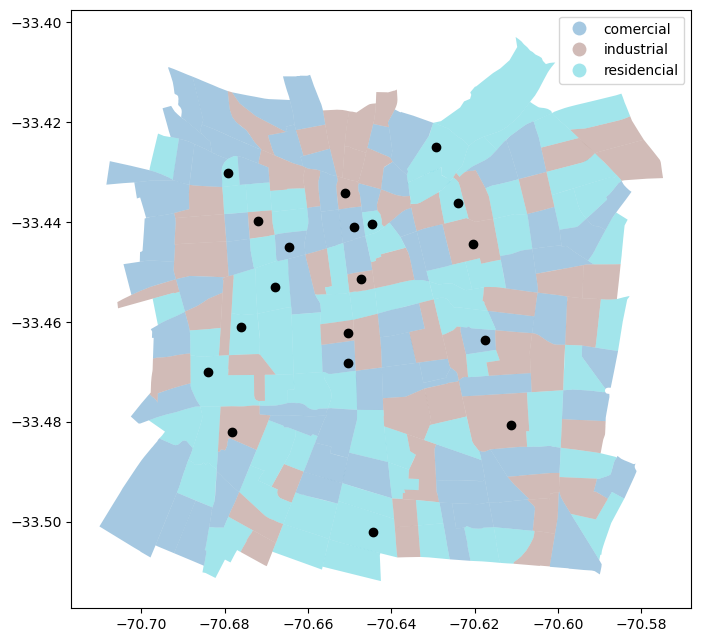

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

zonas.plot(ax=ax, figsize=(10,10), column='Tipo_zona', categorical=True, alpha=0.4, legend=True)
locales.plot(ax=ax, marker='o', color='k')

In [28]:
locales_zonas = gpd.sjoin(locales, zonas, how='left', predicate='intersects', rsuffix='zona')
locales_zonas

,ID_local,geometry,index_zona,ID,Tipo_zona
0,1,POINT (-70.676 -33.461),85,26,residencial
1,2,POINT (-70.668 -33.453),54,15,residencial
2,3,POINT (-70.651 -33.468),88,45,comercial
3,4,POINT (-70.65 -33.462),89,46,industrial
4,5,POINT (-70.649 -33.441),1,20,comercial
5,6,POINT (-70.629 -33.425),19,515,residencial
6,7,POINT (-70.617 -33.464),141,421,comercial
7,8,POINT (-70.644 -33.502),33,646,residencial
8,9,POINT (-70.679 -33.43),56,39,residencial
9,10,POINT (-70.665 -33.445),95,11,comercial


In [29]:
clientes_compras['ID_local'] = clientes_compras['Local'].str.replace('L','').astype('int')

ValueError: cannot convert float NaN to integer

In [30]:
clientes_compras[clientes_compras['Local'].isna()]

,Rut,Edad,ID_transaccion,Fecha,Monto,Local,frac
9744,22322341,80,NaN,NaN,NaN,NaN,NaN


In [31]:
clientes_compras = clientes_compras.drop(9744)

In [32]:
clientes_compras['ID_local'] = clientes_compras['Local'].str.replace('L','').astype('int')
clientes_compras.head()

,Rut,Edad,ID_transaccion,Fecha,Monto,Local,frac,ID_local
0,18001449,17,11468.0,12:33.7,76614.0,L15,0.000136,15
1,18001449,17,19219.0,21:52.8,17547.0,L15,0.000031,15
2,18001449,17,17850.0,05:46.6,36592.0,L5,0.000065,5
3,18001449,17,21089.0,12:11.5,88654.0,L17,0.000158,17
4,18001449,17,18385.0,55:28.4,60884.0,L15,0.000108,15


In [33]:
df = clientes_compras.merge(locales_zonas[['ID_local','Tipo_zona']], on='ID_local', how='left')
df

,Rut,Edad,ID_transaccion,Fecha,Monto,Local,frac,ID_local,Tipo_zona
0,18001449,17,11468.0,12:33.7,76614.0,L15,0.000136,15,residencial
1,18001449,17,19219.0,21:52.8,17547.0,L15,0.000031,15,residencial
2,18001449,17,17850.0,05:46.6,36592.0,L5,0.000065,5,comercial
3,18001449,17,21089.0,12:11.5,88654.0,L17,0.000158,17,residencial
4,18001449,17,18385.0,55:28.4,60884.0,L15,0.000108,15,residencial
...,...,...,...,...,...,...,...,...,...
12295,23490891,77,19778.0,42:17.8,43573.0,L6,0.000077,6,residencial
12296,23490891,77,18275.0,32:28.8,44750.0,L15,0.000080,15,residencial
12297,23490891,77,15595.0,24:46.1,29884.0,L1,0.000053,1,residencial
12298,23490891,77,15206.0,22:09.2,89404.0,L10,0.000159,10,comercial


In [34]:
pv = pd.pivot_table(df, index='Tipo_zona', values='Monto', aggfunc=["sum","mean","std","count"])
pv

,sum,mean,std,count
,Monto,Monto,Monto,Monto
Tipo_zona,,,,
comercial,135813247.0,45468.110814,25577.624574,2987
industrial,196671414.0,46102.066104,25211.000586,4266
residencial,229917303.0,45555.241331,25222.727916,5047


<div class="alert alert-block alert-info">
<b> Desafío:</b> Actualizar el mapa anterior, cambiando el color de cada zona de forma que con ello se indique el promedio del monto de cada compra hecha en las tiendas de esa zona. Ojo que hay zonas con más de un local, y zonas que no tienen ningún local.
    
<b>Los tres primeros estudiantes que me envíen su Jupyter Notebook realizando la actividad tendrán +0.2 en la Tarea 2.</b>
</div>